<a href="https://colab.research.google.com/github/tomersk/learn-python/blob/main/06_07.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 6.7 Filtering
The active RADAR data is affected by speckle/noise. Before we extract some useful information from the satellite data, we need to remove/minimize these speckle from the data. These filters essentially try to remove the high frequency information. In reality this high frequency information
need not to be noise. So we need to specify how much filtering we want. The types of filter can be divided into two categories: adaptive and non adaptive filters. Adaptive filters adapt their weightings across the image to the speckle level, and non-adaptive filters apply the same weightings
uniformly across the entire image. In this section, we will be using one example of both category.
We will use median filter from the non-adaptive filter category, and Wiener filter from the adaptive
category.

We can import the medfilt2d function from the scipy.signal library. First, we read the noisy
data that we saved in tif format from hard disk. Then we apply a filter to it having window size of
3 × 3. Below figure shows the filtered image. When, we compare this image with the original image,
and with the image in which we mixed some noise, we see that filtered images showed relatively smoother spatial
variation, but is nowhere near to the original image.

Mounted at /content/gdrive


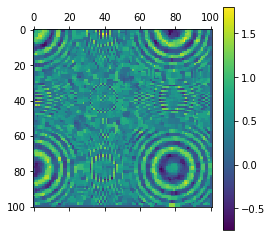

In [ ]:
from osgeo import gdal
from scipy.signal import medfilt2d
from osgeo.gdalconst import *
import matplotlib.pyplot as plt
from google.colab import drive

drive.mount('/content/gdrive')

# read the raster data
driver = gdal.GetDriverByName('GTiff')
file_name = "/content/gdrive/My Drive/Colab Notebooks/LearnPython/data/data_noisy.tif"
dataset = gdal.Open(file_name, GA_ReadOnly)
geotransform = dataset.GetGeoTransform()
data = dataset.GetRasterBand(1).ReadAsArray()
dataset = None

data_median = medfilt2d(data, kernel_size=3) # median filter of 3X3 window
# plot the data
plt.matshow(data_median)
plt.colorbar()
plt.show()

Now, we apply Wiener filter on the same dataset. We keep the same window size for Wiener filter
also. After doing the filtering, we are also saving the data in tif format. This tell use, how can read
some geospatial data, process the feature information (matrix in this case), and then save the feature
information with the co-ordinate information.

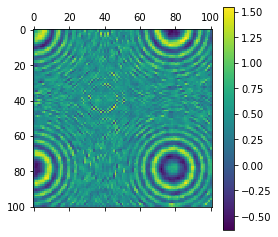

In [ ]:
from scipy.signal import wiener
data_wiener = wiener(data, mysize=(3,3)) # Wiener filter

# plot
plt.matshow(data_wiener)
plt.colorbar()
plt.show()

# save the data into tif format
driver = gdal.GetDriverByName('GTiff')
file_name = "/content/gdrive/My Drive/Colab Notebooks/LearnPython/data/data__filtered.tif"
dataset = driver.Create(file_name, data_wiener.shape[1], data_wiener.shape[0], 1, gdal.GDT_Float32)
dataset.SetGeoTransform(geotransform)
dataset.GetRasterBand(1).WriteArray(data_wiener, 0, 0)
dataset = None